In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\jabir\Desktop\FED_CO_Python\FED_CO_cals_devc_test.csv')

In [5]:
df.head()

,s,mol/mol,mol/mol.1,mol/mol.2,mol/mol.3
0,Time,CO_VolumeFraction00,CO_VolumeFraction01,CO_VolumeFraction02,CO_VolumeFraction03
1,0.000,0.000,0.000,0.000,0
2,3.195,0.000,0.000,0.000,0
3,6.023,0.000,0.000,0.000,4.19451E-78
4,9.020,0.000,0.000,0.000,6.64885E-42


In [6]:
df = df[1:]

In [7]:
df.head()

,s,mol/mol,mol/mol.1,mol/mol.2,mol/mol.3
1,0.000,0.000,0.000,0.000,0
2,3.195,0.000,0.000,0.000,0
3,6.023,0.000,0.000,0.000,4.19451E-78
4,9.020,0.000,0.000,0.000,6.64885E-42
5,12.001,0.000,0.000,0.000,6.75029E-21


In [8]:
df.columns = ['Time', 'CO_01','CO_02', 'CO_03','CO_04']

In [9]:
df.head()

,Time,CO_01,CO_02,CO_03,CO_04
1,0.000,0.000,0.000,0.000,0
2,3.195,0.000,0.000,0.000,0
3,6.023,0.000,0.000,0.000,4.19451E-78
4,9.020,0.000,0.000,0.000,6.64885E-42
5,12.001,0.000,0.000,0.000,6.75029E-21


In [10]:
pd.options.display.float_format = "{:,.5f}".format
df = df.astype(float)

In [11]:
df.tail()

,Time,CO_01,CO_02,CO_03,CO_04
197,588.00300,0.00100,0.00000,0.00100,0.00020
198,591.02700,0.00100,0.00000,0.00100,0.00021
199,594.03500,0.00100,0.00000,0.00100,0.00020
200,597.03300,0.00100,0.00000,0.00100,0.00021
201,600.00000,0.00100,0.00000,0.00100,0.00021


In [12]:
df['Avg_CO'] = df.iloc[:,1:5].mean(axis=1)

In [13]:
df.tail()

,Time,CO_01,CO_02,CO_03,CO_04,Avg_CO
197,588.00300,0.00100,0.00000,0.00100,0.00020,0.00055
198,591.02700,0.00100,0.00000,0.00100,0.00021,0.00055
199,594.03500,0.00100,0.00000,0.00100,0.00020,0.00055
200,597.03300,0.00100,0.00000,0.00100,0.00021,0.00055
201,600.00000,0.00100,0.00000,0.00100,0.00021,0.00055


In [14]:
df['Avg_CO_ppm'] = df['Avg_CO']*10**6

In [15]:
df.tail()

,Time,CO_01,CO_02,CO_03,CO_04,Avg_CO,Avg_CO_ppm
197,588.00300,0.00100,0.00000,0.00100,0.00020,0.00055,550.82525
198,591.02700,0.00100,0.00000,0.00100,0.00021,0.00055,551.70525
199,594.03500,0.00100,0.00000,0.00100,0.00020,0.00055,550.35550
200,597.03300,0.00100,0.00000,0.00100,0.00021,0.00055,551.37050
201,600.00000,0.00100,0.00000,0.00100,0.00021,0.00055,553.16175


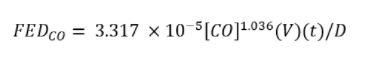

In [16]:
df['FED_CO_timestep'] = 3.317*10**-5*df['Avg_CO_ppm']**1.036*25*(3/60)/30

In [17]:
df.tail()

,Time,CO_01,CO_02,CO_03,CO_04,Avg_CO,Avg_CO_ppm,FED_CO_timestep
197,588.00300,0.00100,0.00000,0.00100,0.00020,0.00055,550.82525,0.00096
198,591.02700,0.00100,0.00000,0.00100,0.00021,0.00055,551.70525,0.00096
199,594.03500,0.00100,0.00000,0.00100,0.00020,0.00055,550.35550,0.00095
200,597.03300,0.00100,0.00000,0.00100,0.00021,0.00055,551.37050,0.00096
201,600.00000,0.00100,0.00000,0.00100,0.00021,0.00055,553.16175,0.00096


In [18]:
df['FED_CO_Cumulative'] = df['FED_CO_timestep'].cumsum(axis=0)

In [19]:
df.tail()

,Time,CO_01,CO_02,CO_03,CO_04,Avg_CO,Avg_CO_ppm,FED_CO_timestep,FED_CO_Cumulative
197,588.00300,0.00100,0.00000,0.00100,0.00020,0.00055,550.82525,0.00096,0.15792
198,591.02700,0.00100,0.00000,0.00100,0.00021,0.00055,551.70525,0.00096,0.15887
199,594.03500,0.00100,0.00000,0.00100,0.00020,0.00055,550.35550,0.00095,0.15983
200,597.03300,0.00100,0.00000,0.00100,0.00021,0.00055,551.37050,0.00096,0.16079
201,600.00000,0.00100,0.00000,0.00100,0.00021,0.00055,553.16175,0.00096,0.16175


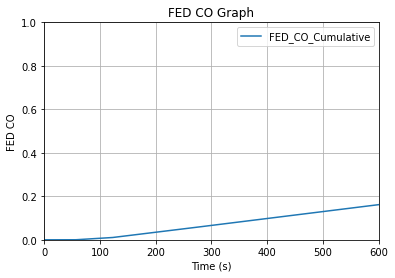

In [20]:
plot = df.plot.line('Time', 'FED_CO_Cumulative')
plot.set_xlabel('Time (s)')
plot.set_ylabel('FED CO')
plt.xlim([0,600])
plt.ylim([0,1])
plt.grid('on')
plot.set_title('FED CO Graph')
plt.show()